In [45]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

In [46]:
M_earth = 5.97*10**24 # [kg] Earth mass
M_gliese = 5.40 # mass of the exoplanet in Earth masses
rho_zero = 18000.0 # [kg/m3] central density 
L=6.500*10**6 # [m] characteristic length

def rho_r(r):
    """Probable density profile,
    r is the distance from the planetary center"""
    
    rho_r = rho_zero*np.exp(-r/L)
    return rho_r



In [47]:
def comp_trapezoidal_rule(f, a, b, N=100):
    """Return the approximation of the integral \int_a^b f(x) dx using
    the trapezoidal rule with N subdivisions.
    """
    s = f(a)
    for i in xrange(1, N):
        # grid i-point 
        x = a + i * (b-a) / float(N)
        # Sum of the rectangle area
        s = s + 2 * f(x)
    s = s + f(b)
    return s * (b-a) / N / 2., b


In [48]:
def integrand(r):
    "function to feed to numerical integrator"
    integrand = rho_r(r)*r**2
    return integrand

# testing snippet
mass_int, R_work = comp_trapezoidal_rule(integrand, 0, 6000000)
computed_mass = mass_int*4*np.pi/M_earth
print computed_mass

1.38828462404


In [55]:
# Brute forcing
i = 1
r_work = 6.3*10**6 # initial radius guess in meters, close to Earth radius
mass_int, r_work = comp_trapezoidal_rule(integrand, 0, r_work)
computed_mass = mass_int*4*np.pi/M_earth
r_list = []
while i < 5000:
    if computed_mass > M_gliese:
        mass_int, r_work = comp_trapezoidal_rule(integrand, 0, r_work/1.001)
        computed_mass = mass_int*4*np.pi/M_earth
        print "r guess decreased"
        print computed_mass, r_work
        i += 1
        r_list.append(r_work)
    else:
        mass_int, r_work = comp_trapezoidal_rule(integrand, 0, r_work*1.001)
        computed_mass = mass_int*4*np.pi/M_earth
        print "r guess increased"
        print computed_mass, r_work
        i += 1
        r_list.append(r_work)
        
        

r guess increased
1.55877295367 6306300.0
r guess increased
1.56237630785 6312606.3
r guess increased
1.56598697626 6318918.9063
r guess increased
1.56960497024 6325237.82521
r guess increased
1.57323030112 6331563.06303
r guess increased
1.57686298026 6337894.62609
r guess increased
1.58050301901 6344232.52072
r guess increased
1.58415042871 6350576.75324
r guess increased
1.58780522073 6356927.32999
r guess increased
1.59146740644 6363284.25732
r guess increased
1.5951369972 6369647.54158
r guess increased
1.5988140044 6376017.18912
r guess increased
1.60249843941 6382393.20631
r guess increased
1.60619031361 6388775.59952
r guess increased
1.60988963839 6395164.37512
r guess increased
1.61359642516 6401559.53949
r guess increased
1.61731068531 6407961.09903
r guess increased
1.62103243024 6414369.06013
r guess increased
1.62476167136 6420783.42919
r guess increased
1.62849842009 6427204.21262
r guess increased
1.63224268784 6433631.41683
r guess increased
1.63599448603 6440065.04825

<IPython.core.display.Javascript object>


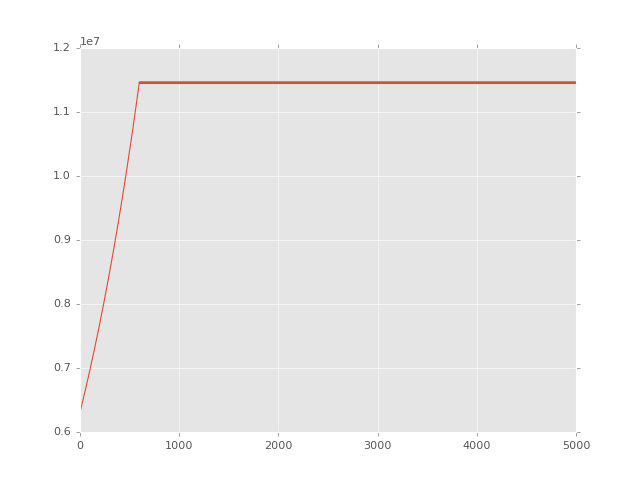

In [56]:
# radius convergence check
xlist = range(len(r_list))
plt.plot(xlist, r_list)
plt.show()

In [52]:
print "Brute force computation: R_gliese = %d kilometers" %(r_work/1000.0)

Brute force computation: R_gliese = 11452 kilometers
